Para este notebook rodar precisa intelar as libs:
```Python
pip install pandas==2.0.3
pip install matplotlib==3.7.2
pip install scikit-learn==1.3.0
pip install imbalanced-learn==0.11.0
pip install jupyterlab==4.0.3
pip install ipywidgets==8.0.7

```

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import ipywidgets as widgets
import os


In [2]:
# Pegando o caminho base e caminho do arquivo
current_dir = os.getcwd()
path_file = os.path.join(current_dir, r"diabetes.csv")

# Lendo o arquivo csv com os dados
dados = pd.read_csv(path_file)

# dropando dados nulos se existentes
dados.dropna(inplace=True)

dados.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [3]:
# Separando as variáveis independentes e dependentes
X = dados.drop("Outcome", axis=1)
y = dados["Outcome"]


In [4]:
# Fazendo a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Fazendo o balanceamento dos dados de treino
sm = SMOTE(random_state=42, sampling_strategy={0: 1000, 1: 1000})
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Mostrando a distribuição das classes antes e depois do oversampling
print("Distribuição das classes antes do oversampling:")
print(y_train.value_counts())
print("Distribuição das classes depois do oversampling:")
print(y_train_res.value_counts())

Distribuição das classes antes do oversampling:
Outcome
0    401
1    213
Name: count, dtype: int64
Distribuição das classes depois do oversampling:
Outcome
0    1000
1    1000
Name: count, dtype: int64


In [6]:
# Treinando um modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res.values, y_train_res.values)


LogisticRegression(max_iter=1000)

In [7]:
# Fazendo a previsão com os dados de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação do modelo
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrando as métricas na tela
print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


Acurácia: 0.69
Precisão: 0.56
Recall: 0.73
F1-score: 0.63


C:\Users\gusta\OneDrive\Documentos\GitHub\prevendo-diabetes\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


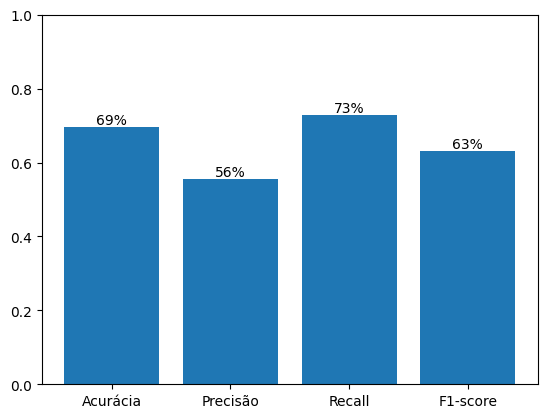

In [8]:
# Criando um gráfico de barras com as métricas do modelo
fig, ax = plt.subplots()
ax.bar(["Acurácia", "Precisão", "Recall", "F1-score"], [acc, prec, rec, f1])
ax.set_ylim(0, 1)

# Adicionando o percentual em cada extremidade das barras
# Criando uma lista de strings com o formato "xx%"
labels = [f"{v*100:.0f}%" for v in [acc, prec, rec, f1]] 
# Rotulando as barras com os valores
ax.bar_label(ax.containers[0], labels=labels, label_type="edge") 

plt.show()


In [9]:
# Importando o módulo de widgets
import ipywidgets as widgets

# Criando um campo de texto para o nome do usuário
nome = widgets.Text(
    value='',
    placeholder='Nome da paciente',
    description='Digite seu nome:',
    disabled=False
)

# Criando um botão para enviar o nome
botao_nome = widgets.Button(
    description='Enviar',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Enviar',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

# Criando uma função para mostrar o nome na tela quando o botão for clicado
def on_button_clicked(b):
    print(f"Olá {nome.value}, seja bem-vindo(a) ao aplicativo de previsão de Diabetes!")

# Associando a função ao evento de clique do botão
botao_nome.on_click(on_button_clicked)

# Mostrando o campo de texto e o botão na tela
widgets.VBox([nome, botao_nome])


In [10]:
# Criando os campos de texto para os dados de entrada
gravidez = widgets.Text(
    value='0',
    placeholder='0',
    description='Número de vezes grávida:',
    disabled=False
)

glicose = widgets.Text(
    value='0',
    placeholder='0',
    description='Concentração de glicose no plasma:',
    disabled=False
)

pressao = widgets.Text(
    value='0',
    placeholder='0',
    description='Pressão arterial diastólica (mm Hg):',
    disabled=False
)

pele = widgets.Text(
    value='0',
    placeholder='0',
    description='Espessura da dobra da pele do tríceps (mm):',
    disabled=False
)

insulina = widgets.Text(
    value='0',
    placeholder='0',
    description='Insulina sérica de 2 horas (mu U/ml):',
    disabled=False
)

imc = widgets.Text(
    value='0',
    placeholder='0.0',
    description='Índice de massa corporal (kg/m^2):',
    disabled=False
)

pedigree = widgets.Text(
    value='0.0',
    placeholder='0.0',
    description='Função pedigree de diabetes:',
    disabled=False
)

idade = widgets.Text(
    value='0',
    placeholder='0',
    description='Idade (anos):',
    disabled=False
)

# Criando um botão para enviar os dados e fazer a previsão
botao_previsao = widgets.Button(
    description='Fazer previsão',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Fazer previsão',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

# Criando uma função para fazer a previsão e mostrar o resultado na tela quando o botão for clicado
def on_button_clicked(b):
    
    # Criando um array com os dados de entrada do usuário
    dados = [float(gravidez.value), float(glicose.value), float(pressao.value), float(pele.value), float(insulina.value), float(imc.value), float(pedigree.value), float(idade.value)]
    
    # Fazendo a previsão usando o modelo treinado
    resultado = model.predict([dados])
    
    # Mostrando o resultado da previsão na tela
    if resultado == 0:
        print("Parabéns, você não está propensa a ter diabetes!")
    else:
        print("Atenção, você está propensa a ter diabetes! Procure um médico para orientações.")

# Associando a função ao evento de clique do botão
botao_previsao.on_click(on_button_clicked)

# Mostrando os campos de texto e o botão na tela
widgets.VBox([gravidez, glicose, pressao, pele, insulina, imc, pedigree, idade, botao_previsao])


In [ ]:
# Inicia o streamlit em outra porta
import os
os.system("streamlit run app.py")
